In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix , accuracy_score 
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Shebin's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
df = pd.read_csv('MSFT Historical data & News.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse)

In [3]:
df

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2015-01-02,46.760,27843560,46.66,47.4200,46.54,What to expect from Apple in 2015 beyond its s...
2015-01-05,46.325,39667400,46.37,46.7300,46.25,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
2015-01-06,45.650,36434980,46.38,46.7490,45.54,"Technology Transforming Cars Into ""Phones On W..."
2015-01-07,46.230,29103920,45.98,46.4600,45.49,"Technology Transforming Cars Into ""Phones On W..."
2015-01-08,47.590,29634030,46.75,47.7499,46.72,"Technology Transforming Cars Into ""Phones On W..."
...,...,...,...,...,...,...
2021-06-03,245.710,25307710,245.22,246.3400,243.00,Buy RH Stock on the Dip Before Q1 Earnings for...
2021-06-04,250.790,25281090,247.76,251.6500,247.51,"Global equities nearly grasp all-time record, ..."
2021-06-07,253.810,23079170,249.98,254.0900,249.81,Apple employees want more remote-work flexibil...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1620 entries, 2015-01-02 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      1620 non-null   float64
 1   Volume     1620 non-null   int64  
 2   Open       1620 non-null   float64
 3   High       1620 non-null   float64
 4   Low        1620 non-null   float64
 5   Headlines  1620 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 88.6+ KB


In [5]:
df['Volume']=df['Volume'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1620 entries, 2015-01-02 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      1620 non-null   float64
 1   Volume     1620 non-null   float64
 2   Open       1620 non-null   float64
 3   High       1620 non-null   float64
 4   Low        1620 non-null   float64
 5   Headlines  1620 non-null   object 
dtypes: float64(5), object(1)
memory usage: 88.6+ KB


In [7]:
df.isnull().sum()

Close        0
Volume       0
Open         0
High         0
Low          0
Headlines    0
dtype: int64

<AxesSubplot:xlabel='variable', ylabel='value'>

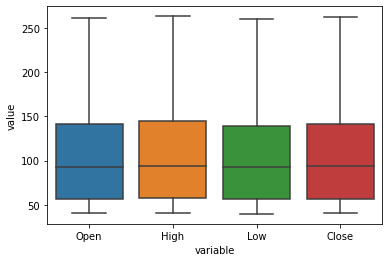

In [8]:
#checking for outliers
col = ['Open','High','Low','Close']
ft = df[col]
sns.boxplot(x="variable", y="value",data=pd.melt(ft))  

In [9]:
df['Headlines'] = df['Headlines'].astype(str)

In [10]:
df.Headlines.replace("[^a-zA-Z]"," ",regex=True,inplace=True)
df.head()

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2015-01-02,46.760,27843560.0,46.66,47.4200,46.54,What to expect from Apple in beyond its s...
2015-01-05,46.325,39667400.0,46.37,46.7300,46.25,SIM free iPhone Plus reportedly debuting ...
2015-01-06,45.650,36434980.0,46.38,46.7490,45.54,Technology Transforming Cars Into Phones On W...
2015-01-07,46.230,29103920.0,45.98,46.4600,45.49,Technology Transforming Cars Into Phones On W...
2015-01-08,47.590,29634030.0,46.75,47.7499,46.72,Technology Transforming Cars Into Phones On W...


In [11]:
df['Headlines'] = df['Headlines'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
stop = stopwords.words('english')
df['Headlines'] = df['Headlines'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
st = PorterStemmer()
df['Headlines'] = df['Headlines'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [14]:
#Apply lemmatization
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  #used to perform lemmatization
def lemmat(text):
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    return ' '.join([lemma.lemmatize(word) for word in words])
df['Headlines'] = df['Headlines'].apply(lemmat)
df

[nltk_data] Downloading package punkt to C:\Users\Shebin's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shebin's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2015-01-02,46.760,27843560.0,46.66,47.4200,46.54,expect appl beyond smartwatch amazon quot late...
2015-01-05,46.325,39667400.0,46.37,46.7300,46.25,sim free iphon plu reportedli debut tomorrow l...
2015-01-06,45.650,36434980.0,46.38,46.7490,45.54,technolog transform car phone wheel appl quot ...
2015-01-07,46.230,29103920.0,45.98,46.4600,45.49,technolog transform car phone wheel appl quot ...
2015-01-08,47.590,29634030.0,46.75,47.7499,46.72,technolog transform car phone wheel appl quot ...
...,...,...,...,...,...,...
2021-06-03,245.710,25307710.0,245.22,246.3400,243.00,buy rh stock dip q earn growth wwdc expect app...
2021-06-04,250.790,25281090.0,247.76,251.6500,247.51,global equiti nearli grasp time record dollar ...
2021-06-07,253.810,23079170.0,249.98,254.0900,249.81,appl employe want remot work flexibl post covi...


In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to C:\Users\Shebin's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
analyzer = SentimentIntensityAnalyzer()

# calculating sentiment scores
df['compound'] = df['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['negative'] = df['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neutral'] = df['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
df['positive'] = df['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['pos'])


In [17]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [18]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
df['Subjectivity']=df['Headlines'].apply(getsubjectivity)
df['Polarity']=df['Headlines'].apply(getpolarity)
df

,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive,Subjectivity,Polarity
Date,,,,,,,,,,,,
2015-01-02,46.760,27843560.0,46.66,47.4200,46.54,expect appl beyond smartwatch amazon quot late...,0.9918,0.015,0.848,0.137,0.500824,0.134640
2015-01-05,46.325,39667400.0,46.37,46.7300,46.25,sim free iphon plu reportedli debut tomorrow l...,0.9948,0.029,0.824,0.147,0.417707,0.093826
2015-01-06,45.650,36434980.0,46.38,46.7490,45.54,technolog transform car phone wheel appl quot ...,0.7906,0.058,0.869,0.072,0.423851,0.110063
2015-01-07,46.230,29103920.0,45.98,46.4600,45.49,technolog transform car phone wheel appl quot ...,0.7906,0.058,0.869,0.072,0.423851,0.110063
2015-01-08,47.590,29634030.0,46.75,47.7499,46.72,technolog transform car phone wheel appl quot ...,0.7906,0.058,0.869,0.072,0.423851,0.110063
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03,245.710,25307710.0,245.22,246.3400,243.00,buy rh stock dip q earn growth wwdc expect app...,0.9919,0.052,0.839,0.109,0.376462,0.118729
2021-06-04,250.790,25281090.0,247.76,251.6500,247.51,global equiti nearli grasp time record dollar ...,0.9941,0.032,0.866,0.102,0.404654,0.102977
2021-06-07,253.810,23079170.0,249.98,254.0900,249.81,appl employe want remot work flexibl post covi...,0.9382,0.046,0.864,0.091,0.204959,0.042975


In [20]:
df = df[['Close','Volume','Open','High','Low','compound', 'negative', 'neutral', 'positive','Subjectivity','Polarity']]
df.head()

,Close,Volume,Open,High,Low,compound,negative,neutral,positive,Subjectivity,Polarity
Date,,,,,,,,,,,
2015-01-02,46.760,27843560.0,46.66,47.4200,46.54,0.9918,0.015,0.848,0.137,0.500824,0.134640
2015-01-05,46.325,39667400.0,46.37,46.7300,46.25,0.9948,0.029,0.824,0.147,0.417707,0.093826
2015-01-06,45.650,36434980.0,46.38,46.7490,45.54,0.7906,0.058,0.869,0.072,0.423851,0.110063
2015-01-07,46.230,29103920.0,45.98,46.4600,45.49,0.7906,0.058,0.869,0.072,0.423851,0.110063
2015-01-08,47.590,29634030.0,46.75,47.7499,46.72,0.7906,0.058,0.869,0.072,0.423851,0.110063


In [21]:
X=df[['Volume','Open','High','Low','compound', 'negative', 'neutral', 'positive','Subjectivity','Polarity']]
y=df['Close']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [23]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
print(regressor.coef_)

[-2.02118328e-09 -6.18054423e-01  8.30426723e-01  7.87587449e-01
  2.29691198e-02  1.84415773e+01  1.83005164e+01  1.80046453e+01
 -3.65378587e-01 -1.26712097e-01]


In [25]:
print(regressor.intercept_)

-18.024367067179128


In [26]:
predicted=regressor.predict(X_test)
print(X_test)

                Volume    Open      High      Low  compound  negative  \
Date                                                                    
2019-05-29  22763140.0  125.38  125.3900  124.040   -0.8979     0.087   
2021-03-29  25227460.0  236.59  236.8000  231.880    0.6369     0.093   
2016-04-12  24874410.0   54.37   54.7800   53.760    0.9042     0.028   
2016-05-23  26110160.0   50.60   50.6800   49.980    0.4588     0.054   
2021-02-04  25296100.0  242.66  243.2399  240.370    0.9896     0.062   
...                ...     ...       ...      ...       ...       ...   
2015-04-22  25032050.0   42.67   43.1300   42.550    0.9633     0.049   
2020-11-24  33979730.0  209.59  214.2500  208.860    0.9956     0.054   
2019-07-18  30808710.0  135.55  136.6200  134.670    0.8689     0.072   
2017-12-13  21708830.0   85.74   86.0000   85.170    0.9953     0.018   
2018-07-16  20782300.0  105.40  105.8200  104.515    0.9705     0.071   

            neutral  positive  Subjectivity  Polar

In [27]:
predicted.shape

(324,)

In [28]:
df1=pd.DataFrame({'Actual price': y_test,'Predicted price':predicted})
df1=df1.sort_values(by='Date')
df1

,Actual price,Predicted price
Date,,
2015-01-07,46.23,46.026086
2015-01-12,46.60,46.810065
2015-01-15,45.48,45.749689
2015-01-23,47.18,47.012246
2015-01-26,47.01,46.528188
...,...,...
2021-05-04,247.79,247.084796
2021-05-13,243.03,244.707686
2021-05-17,245.18,244.254286


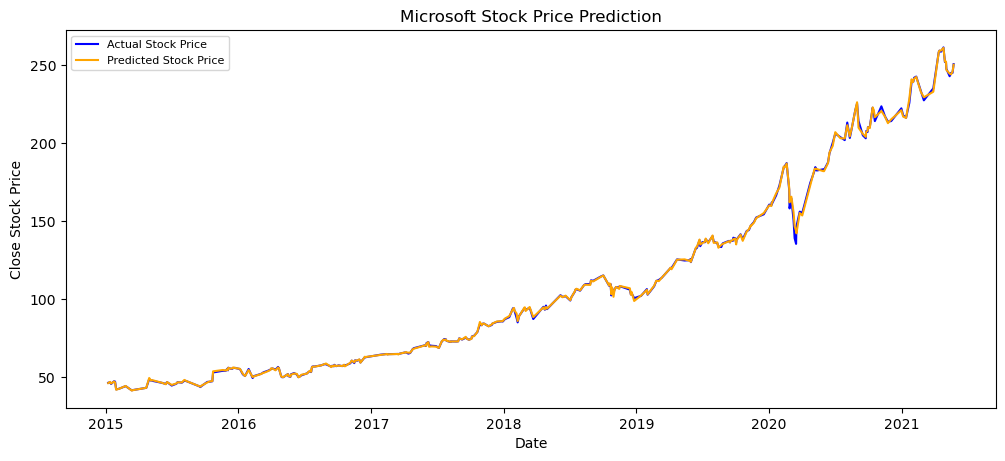

In [29]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df1['Actual price'], color = 'blue', label='Actual Stock Price')
plt.plot(df1['Predicted price'], color = 'orange',label='Predicted Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
import math
print(regressor.score(X_test,y_test)*100) 

99.9710226565232


In [31]:
print('Mean absolute Error :' ,metrics.mean_absolute_error(y_test,predicted))
print('Mean squared error:',metrics.mean_squared_error(y_test,predicted))
print('Root mean squared error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean absolute Error : 0.5406821028807133
Mean squared error: 1.065984215534302
Root mean squared error: 1.0324651158922038


<AxesSubplot:xlabel='Date'>

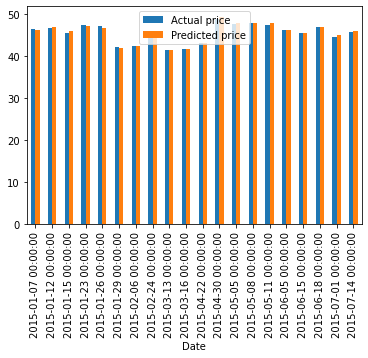

In [32]:
graph=df1.head(20)
graph.plot(kind='bar')

In [33]:
from sklearn.metrics import r2_score
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,regressor.predict(X_train))}\t{r2_score(y_test,regressor.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9998451526735533	0.999710226565232



In [34]:
#use k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.99984942, 0.99989167, 0.99981395, 0.99978533, 0.99980643])

In [35]:
import datetime
last_day = df.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-10 00:00:00


In [36]:
X.columns

Index(['Volume', 'Open', 'High', 'Low', 'compound', 'negative', 'neutral',
       'positive', 'Subjectivity', 'Polarity'],
      dtype='object')

In [37]:
#Function to predict Close

def predict_price(Open,High,Low,Volume,Headlines):
    data = {'Volume':[Volume],'Open':[Open],'High':[High],'Low':[Low],'Headlines':[Headlines]}
    df2 = pd.DataFrame(data)
    df2['Headlines'] = df2['Headlines'].astype(str)
    df2.Headlines.replace("[^a-zA-Z]"," ",regex=True,inplace=True)
    df2['Headlines'] = df2['Headlines'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df2['Headlines'] = df2['Headlines'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    df2['Headlines'] = df2['Headlines'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    df2['Headlines'] = df2['Headlines'].apply(lemmat)
    df2['compound'] = df2['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    df2['negative'] = df2['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
    df2['neutral'] = df2['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
    df2['positive'] = df2['Headlines'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
    df2['Subjectivity']=df2['Headlines'].apply(getsubjectivity)
    df2['Polarity']=df2['Headlines'].apply(getpolarity)
    df2_testdata= df2[['Volume','Open','High','Low','compound', 'negative', 'neutral', 'positive','Subjectivity','Polarity']]
    return regressor.predict(df2_testdata)[0]
  

In [38]:
prediction = predict_price(285.17,286.66,283.91,20944846.00,"Microsoft, Alphabet and Apple Post $57 Billion In Earnings, ‘PGRO’ Profits")

In [39]:
print("Close :" ,prediction)

Close : 285.56073851964595


In [40]:
#Saving model
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(regressor,pickle_out)
pickle_out.close()